In [3]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt 

path = 'DataScience_salaries_2024.csv'

salaries_df = pd.read_csv(path)

salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


## Does the compay size influence the salary?

Statistics of Salary by Company Size:
------------------------------------------------------------
Company Size    Count      Mean       Std        Min        25%        50%        75%       
------------------------------------------------------------
L               983        139602.46  74183.85   15000.0    79833.0    136000.0   200000.0   423000.0  
M               13674      151450.54  68295.97   15000.0    105000.0   143150.0   186000.0   800000.0  
S               181        86614.57   58501.97   15809.0    50000.0    70179.0    114047.0   416000.0  
------------------------------------------------------------


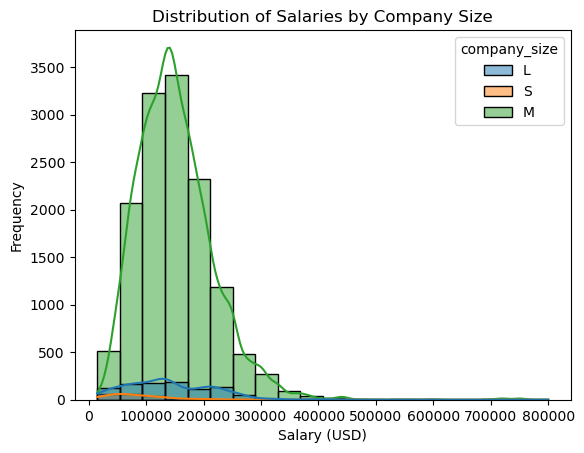

<Axes: title={'center': 'Mean Salary by Company Size'}, xlabel='Company Size', ylabel='Mean Salary'>

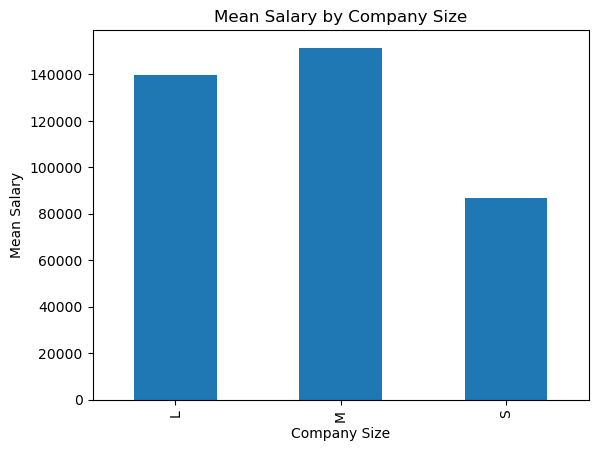

In [16]:
# Calculate statistics of salary by company size
salaries_by_company_size = salaries_df.groupby('company_size')['salary_in_usd'].describe()

# Print statistics of salary by company size
print("Statistics of Salary by Company Size:")
print("-" * 60)
print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Company Size", "Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max"))
print("-" * 60)

for company_size, stats in salaries_by_company_size.iterrows():
    count = int(stats['count'])
    mean = round(stats['mean'], 2)
    std = round(stats['std'], 2)
    min_salary = round(stats['min'], 2)
    percentile_25 = round(stats['25%'], 2)
    median = round(stats['50%'], 2)
    percentile_75 = round(stats['75%'], 2)
    max_salary = round(stats['max'], 2)
    print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(company_size, count, mean, std, min_salary, percentile_25, median, percentile_75, max_salary))

print("-" * 60)


# Histogram of distribution of Salary 
sns.histplot(data=salaries_df, x='salary_in_usd', hue='company_size', kde=True, bins=20)
plt.title('Distribution of Salaries by Company Size')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

#Bar Graph
salaries_by_company_size['mean'].plot(kind='bar', xlabel='Company Size', ylabel='Mean Salary', title='Mean Salary by Company Size')



# Conclusion:
## The results of the analysis suggest that medium-sized companies offer even better salaries than large companies. This finding may indicate that medium-sized companies have more flexibility in offering competitive salaries to attract and retain talent, compared to larger corporations where salary structures may be more rigid.

## How much does remote or in-site job impact salary?

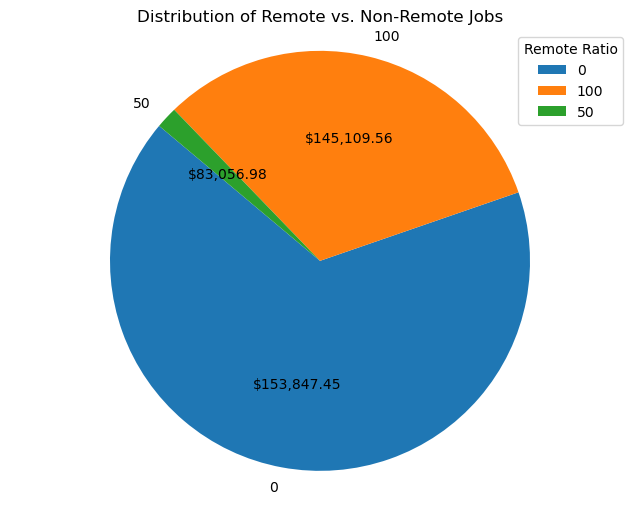

In [31]:

# Calculate proportion of in-site and remote jobs
remote_ratio_counts = salaries_df['remote_ratio'].value_counts(normalize=True) * 100

# Make cake graph
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(remote_ratio_counts, labels=remote_ratio_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Remote vs. Non-Remote Jobs')
plt.axis('equal')

# Add values to each section of graph
for i, autotext in enumerate(autotexts):
    autotext.set_text(f"${salaries_df[salaries_df['remote_ratio'] == remote_ratio_counts.index[i]]['salary_in_usd'].mean():,.2f}")

plt.legend(title="Remote Ratio", loc="best")

plt.show()




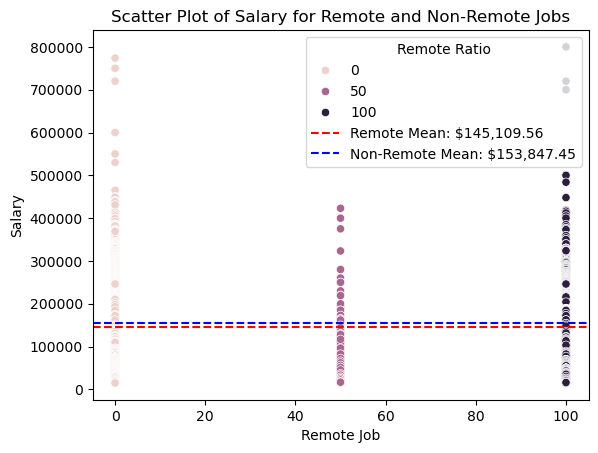

In [7]:
# Make scatter plot
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=salaries_df, hue='remote_ratio')
plt.xlabel('Remote Job')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary for Remote and Non-Remote Jobs')
plt.legend(title='Remote Ratio', loc='upper right')

# Calcular la media de los salarios para trabajos remotos y no remotos
remote_mean = salaries_df[salaries_df['remote_ratio'] == 100]['salary_in_usd'].mean()
non_remote_mean = salaries_df[salaries_df['remote_ratio'] == 0]['salary_in_usd'].mean()

# Dibujar líneas para resaltar la media de cada tipo de trabajo
plt.axhline(remote_mean, color='red', linestyle='--', label=f'Remote Mean: ${remote_mean:,.2f}')
plt.axhline(non_remote_mean, color='blue', linestyle='--', label=f'Non-Remote Mean: ${non_remote_mean:,.2f}')

plt.legend(title='Remote Ratio', loc='upper right')
plt.show()


# Conclusion:
## The results indicate that there isn't much difference in salary between on-site and remote jobs overall. However, a notable difference arises when the job offers a balanced ratio of on-site and remote work (50/50). In such cases, remote jobs tend to offer higher salaries compared to on-site positions.